In [1]:
import pandas as pd

In [13]:
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

In [2]:
start_date = '2010-01-1'
end_date = '2010-12-31'
dates = pd.date_range(start_date, end_date)

df1 = pd.DataFrame(index=dates)

#dfSPY = pd.read_csv("../data/stocks/SPY.csv", index_col=["Date"])

In [3]:
#df1 = df1.join(dfSPY, how="inner")

In [4]:
#df1 = df1.dropna()

In [5]:
#df1.head()

In [6]:
symbols =['SPY','GOOG','IBM','GLD']
for symbol in symbols:
    df_temp = pd.read_csv("../data/stocks/{}.csv".format(symbol), index_col='Date',\
                         parse_dates=True, usecols=['Date', 'Adj Close'])
    df_temp = df_temp.rename(columns={'Adj Close': symbol})
    df1 = df1.join(df_temp)
    df1 = df1.dropna()

In [84]:
def get_data(symbols, dates):
    df_new = pd.DataFrame(index=dates)
    if "SPY" not in symbols:
        symbols.insert(0,"SPY")
    for symbol in symbols:
        df_temp = pd.read_csv("../data/stocks/{}.csv".format(symbol), index_col='Date',\
                             parse_dates=True, usecols=['Date', 'Adj Close'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df_new = df_new.join(df_temp)
        if symbol == "SPY":
            df_new = df_new.dropna()
    return df_new

In [7]:
df1.head()

,SPY,GOOG,IBM,GLD
2010-01-04,108.27,626.75,126.24,109.80
2010-01-05,108.56,623.99,124.71,109.70
2010-01-06,108.64,608.26,123.90,111.51
2010-01-07,109.10,594.10,123.47,110.82
2010-01-08,109.46,602.02,124.71,111.37


In [8]:
df = df1

## Slicing

In [10]:
# Row Slicing
df.ix['2010-01-01':'2010-01-31'].head()

,SPY,GOOG,IBM,GLD
2010-01-04,108.27,626.75,126.24,109.80
2010-01-05,108.56,623.99,124.71,109.70
2010-01-06,108.64,608.26,123.90,111.51
2010-01-07,109.10,594.10,123.47,110.82
2010-01-08,109.46,602.02,124.71,111.37


In [12]:
df.ix['2010-01-01':'2010-01-31', ['SPY','GOOG']]

,SPY,GOOG
2010-01-04,108.27,626.75
2010-01-05,108.56,623.99
2010-01-06,108.64,608.26
2010-01-07,109.10,594.10
2010-01-08,109.46,602.02
2010-01-11,109.61,601.11
2010-01-12,108.59,590.48
2010-01-13,109.51,587.09
2010-01-14,109.80,589.85
2010-01-15,108.57,580.00


In [19]:
##Normalize Data
df = df/df.ix[0,:]

In [121]:
def plot_data(df, title="Stock Prices", ylabel=None):
    if ylabel is None:
        ylabel = "Price"
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    plt.show()

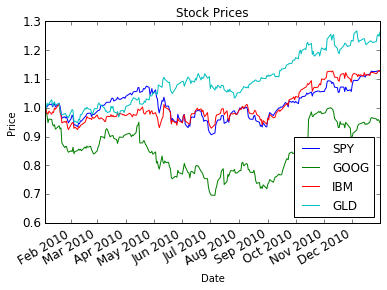

In [21]:
plot_data(df)

# Numpy

In [22]:
import numpy as np

In [23]:
print(np.array([2,3,4]))

[2 3 4]


In [25]:
print(np.array([[2,3,4],[5,6,7]]))

[[2 3 4]
 [5 6 7]]


In [26]:
print(np.empty(3))

[  6.36598737e-314   1.06099790e-313   1.48539705e-313]


In [29]:
print(np.empty((3,3,3)))

[[[  6.23042070e-307   4.67296746e-307   1.69121096e-306]
  [  1.33512376e-306   1.89146896e-307   1.37961302e-306]
  [  1.05699242e-307   8.01097889e-307   1.78020169e-306]]

 [[  7.56601165e-307   1.02359984e-306   6.89804133e-307]
  [  9.34609790e-307   1.95818994e-306   1.37961370e-306]
  [  6.89806849e-307   1.20160711e-306   1.69119330e-306]]

 [[  1.11260144e-306   6.89812281e-307   1.42418172e-306]
  [  2.04712906e-306   7.56589622e-307   1.11258277e-307]
  [  8.90111708e-307  -3.57319051e-194   5.13799221e-317]]]


In [30]:
print(np.ones((5,4)))

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


In [31]:
np.random.random((5,4))

array([[ 0.64749336,  0.55432896,  0.96594332,  0.6170951 ],
       [ 0.27593582,  0.44567957,  0.25571594,  0.07608681],
       [ 0.65406027,  0.33094521,  0.77561206,  0.82221998],
       [ 0.78026093,  0.12708356,  0.72211352,  0.14684415],
       [ 0.41991753,  0.49786996,  0.30829397,  0.81647592]])

In [32]:
np.random.rand(5,4)

array([[ 0.51783057,  0.33829353,  0.98847793,  0.84429069],
       [ 0.02014734,  0.74311457,  0.41240209,  0.98525622],
       [ 0.2058803 ,  0.91259622,  0.75082786,  0.72782441],
       [ 0.03578517,  0.98530677,  0.90232533,  0.87829593],
       [ 0.43250341,  0.13441393,  0.48003081,  0.95265596]])

In [35]:
np.random.normal(50,10,size=(5,4))

array([[ 45.33225719,  65.02162476,  63.65860923,  60.10556506],
       [ 58.45158016,  63.91387137,  51.19768958,  55.36857875],
       [ 34.02889332,  61.91395473,  48.90928564,  44.68801346],
       [ 68.9004657 ,  51.96062269,  53.77470841,  50.63332871],
       [ 62.78516876,  36.45939147,  30.54830919,  41.57274666]])

In [36]:
print(np.random.randint(10))
print(np.random.randint(0, 10))
print(np.random.randint(0, 10, size=5))
print(np.random.randint(0, 10, size=(3,3)))

7
3
[0 7 2 0 1]
[[2 9 5]
 [8 9 7]
 [4 5 9]]


In [37]:
a = np.random.random((5,4))

In [38]:
a.shape[0], a.shape[1]

(5, 4)

In [40]:
# number of elements in array
a.size

20

In [42]:
a.dtype

dtype('float64')

In [46]:
arr = np.random.randint(0, 10, size=(5,5))

In [49]:
arr.sum(axis=0)

array([21, 33, 25, 30, 10])

In [50]:
arr.sum(axis=1)

array([23, 31, 24, 26, 15])

In [51]:
arr.mean()

4.7599999999999998

# Rolling Statistics

In [75]:
start_date = '2012-01-1'
end_date = '2012-12-31'
dates = pd.date_range(start_date, end_date)

In [76]:
symbols = ['SPY']
df = get_data(symbols, dates)

In [77]:
df.head()

,SPY
2012-01-03,126.29
2012-01-04,126.49
2012-01-05,126.82
2012-01-06,126.50
2012-01-09,126.80


C:\Users\Kunal\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
  from ipykernel import kernelapp as app


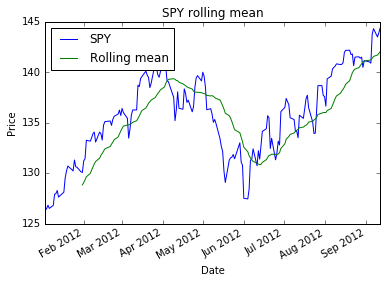

In [78]:
ax = df['SPY'].plot(title="SPY rolling mean", label='SPY')
rm_SPY = pd.rolling_mean(df['SPY'], window=20)
rm_SPY.plot(label='Rolling mean', ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

In [79]:
#rm_SPY = pd.rolling_mean(df['SPY'], window=20)

In [80]:
#rm_SPY.plot(label='Rolling mean', ax=ax)

In [81]:
#df.head()

## Handling Missing Data

In [85]:
def plot(df_date):
    ax = df_data.plot(title="Incomplete Date", fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

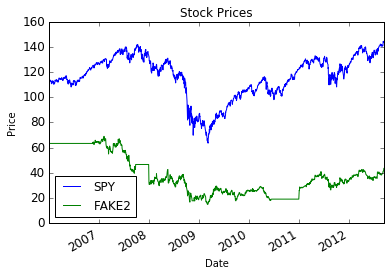

In [89]:
symbollist = ['FAKE2']
start_date = '2005-12-31'
end_date = '2014-12-07'

idx = pd.date_range(start_date, end_date)
df_data = get_data(symbollist, idx)
df_data = df_data.fillna(method="ffill")
df_data = df_data.fillna(method="bfill")
plot_data(df_data)

## Plot a histogram

In [90]:
dates = pd.date_range('2009-01-01','2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

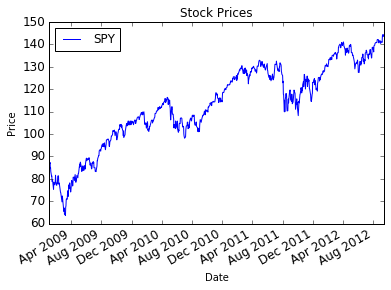

In [91]:
plot_data(df)

In [118]:
def compute_daily_return(df):
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:].values / df[:-1].values) - 1
    daily_returns.ix[0,:] = 0
    return daily_returns

In [119]:
daily_returns = compute_daily_return(df)

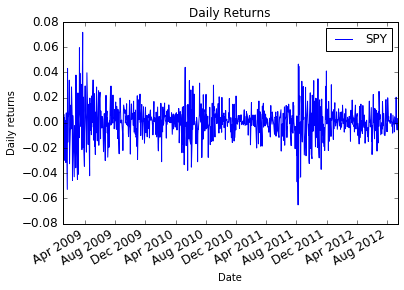

In [122]:
plot_data(daily_returns, title="Daily Returns", ylabel="Daily returns")

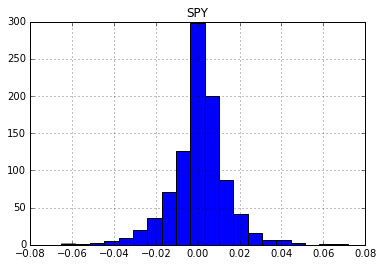

In [125]:
daily_returns.hist(bins=20)
plt.show()

In [126]:
mean = daily_returns['SPY'].mean()
print(mean)

0.0006355783322251791


In [127]:
std = daily_returns['SPY'].std()
print(std)

0.013370490899409858


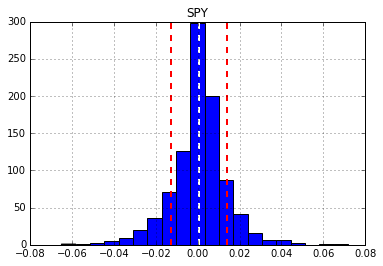

In [129]:
daily_returns.hist(bins=20)
plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(mean+std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(mean-std, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [131]:
## This has thick tales
daily_returns.kurtosis()

SPY    3.220278
dtype: float64

In [132]:
## Plot 2 histograms

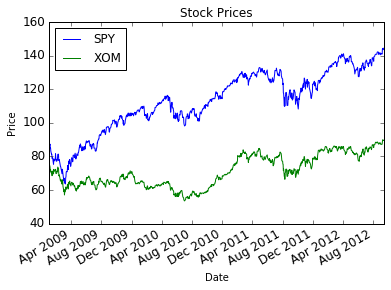

In [133]:
symbols = ['SPY','XOM']
df = get_data(symbols, dates)
plot_data(df)

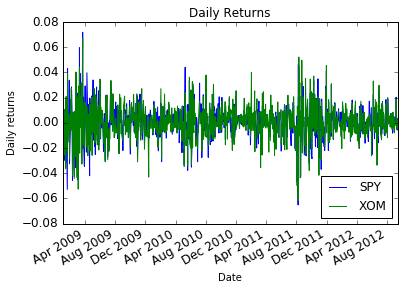

In [134]:
daily_returns = compute_daily_return(df)
plot_data(daily_returns, title="Daily Returns", ylabel="Daily returns")

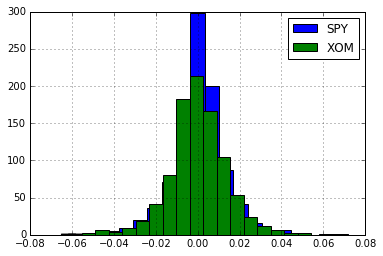

In [138]:
daily_returns['SPY'].hist(bins=20, label="SPY")
daily_returns['XOM'].hist(bins=20, label="XOM")
plt.legend(loc='best')
# plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
# plt.axvline(mean+std, color='r', linestyle='dashed', linewidth=2)
# plt.axvline(mean-std, color='r', linestyle='dashed', linewidth=2)
plt.show()

## Scatterplots in python

In [140]:
symbols = ['SPY','XOM','GLD']
df = get_data(symbols, dates)

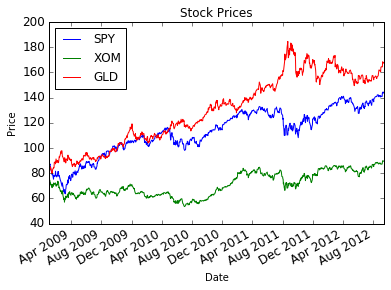

In [141]:
plot_data(df)

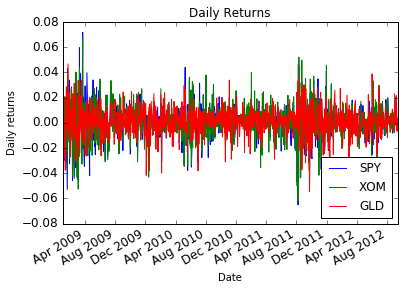

In [142]:
daily_returns = compute_daily_return(df)
plot_data(daily_returns, title="Daily Returns", ylabel="Daily returns")

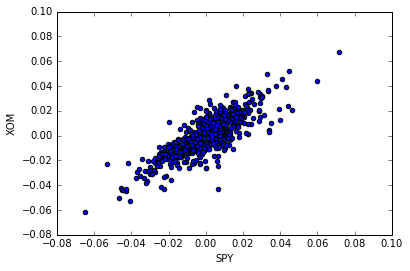

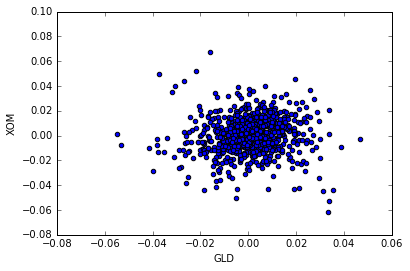

In [145]:
daily_returns.plot(kind='scatter', x='SPY', y ='XOM')
daily_returns.plot(kind='scatter', x='GLD', y ='XOM')
plt.show()

In [146]:
beta_XOM, alpha_XOM = np.polyfit(daily_returns['SPY'], daily_returns['XOM'],1)

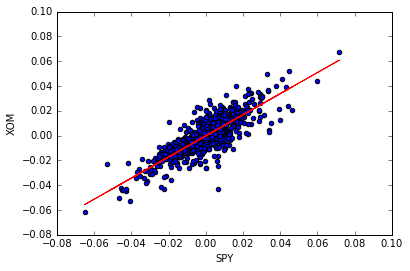

In [149]:
daily_returns.plot(kind='scatter', x='SPY', y ='XOM')
#daily_returns.plot(kind='scatter', x='GLD', y ='XOM')
plt.plot(daily_returns['SPY'], beta_XOM*daily_returns['SPY'] + alpha_XOM, '-',color='r')
plt.show()

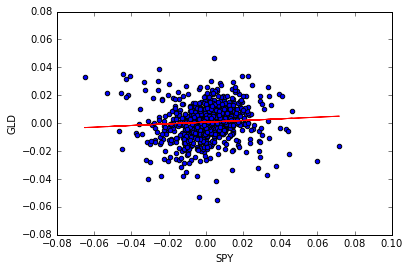

In [150]:
beta_GLD, alpha_GLD = np.polyfit(daily_returns['SPY'], daily_returns['GLD'],1)
daily_returns.plot(kind='scatter', x='SPY', y ='GLD')
#daily_returns.plot(kind='scatter', x='GLD', y ='XOM')
plt.plot(daily_returns['SPY'], beta_GLD*daily_returns['SPY'] + alpha_GLD, '-',color='r')
plt.show()

In [151]:
print("Alpha XOM: " + str(alpha_XOM))
print("Beta XOM: " + str(beta_XOM))
print("Alpha GLD: " + str(alpha_GLD))
print("Beta GLD: " + str(beta_GLD))

Alpha XOM: -0.00024686727668
Beta XOM: 0.850746223673
Alpha GLD: 0.00074788111616
Beta GLD: 0.0597611348322


In [152]:
daily_returns.corr(method='pearson')

,SPY,XOM,GLD
SPY,1.000000,0.820241,0.067324
XOM,0.820241,1.000000,0.069687
GLD,0.067324,0.069687,1.000000
